In [1]:
import numpy as np
import math
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.ticker
import matplotlib.colors as mplc
import scipy
from scipy.interpolate import interp1d
from scipy import optimize
import pandas as pd
import os
import re

In [74]:
files_list = []

for file in os.listdir('G2F'):
    if file.endswith(".xlsm"):
        files_list.append(file)
        
files_list.sort()
files_list.sort(key=lambda f: int(re.sub('\D', '', f)))

In [75]:
time_stamp = []
pv = []
ref_suns = []

for i in range(len(files_list)):
    x = files_list[i].split('-')
    if x[3] == ('MC.xlsm'):
        time = np.array(x[2].split('S'))[0]
        time_stamp.append(time)

        pv.append(np.array(pd.read_excel('G2F/%s'%files_list[i], sheet_name = 'RawData', header = 1, index_col = None, usecols = str('B'), skiprows = 0, skipfooter = 0)).flatten())
        ref_suns.append(np.array(pd.read_excel('G2F/%s'%files_list[i], sheet_name = 'RawData', header = 1, index_col = None, usecols = str('D'), skiprows = 0, skipfooter = 0)).flatten())

In [78]:
sunsl= np.arange(0.1,1.01,0.1)
t = np.array(sunsl).flatten()
scaled_t = (t - t.min()) / t.ptp()
colors = plt.cm.rainbow(scaled_t)


time_s = []
voltages_per_sun = [] 

for i in range(len(time_stamp)):
    time_s.append([int(s) for s in time_stamp[i].split() if s.isdigit()])
    pv_from_suns = interp1d(ref_suns[i],pv[i], 'linear')
    pv_suns = []
    for j in range(len(sunsl)):
        pv_suns.append(pv_from_suns(sunsl[j]).item())
    voltages_per_sun.append(pv_suns)


<ipython-input-79-11a6a58b4cbc>:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(time_s,v,edgecolors = colors[i], c = '')


[]

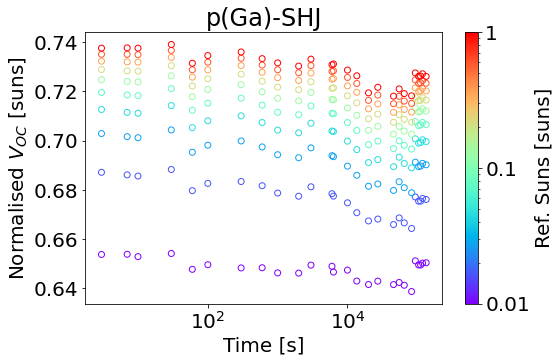

In [79]:
plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 20})

for i in range(len(sunsl)):
    v = []
    vn = []
    for j in range(len(time_s)):
        v.append(voltages_per_sun[j][i])
        vn.append(voltages_per_sun[j][i]/voltages_per_sun[0][i])
    plt.scatter(time_s,v,edgecolors = colors[i], c = '')
    
norm = matplotlib.colors.LogNorm(vmin = 0.01,vmax =1)
scale = plt.colorbar(cm.ScalarMappable(norm = norm, cmap=plt.cm.rainbow),ticks = [0.01,0.1,1])
scale.ax.set_yticklabels([0.01,0.1,1]) 
scale.set_label('Ref. Suns [suns]')

plt.title('p(Ga)-SHJ')
plt.xlabel('Time [s]')
plt.ylabel('Normalised $V_{OC}$ [suns]')
plt.semilogx()
# plt.ylim(0.71,0.74)


# 